[0.4] number of particles in boudnary cell
0.006944417953491211
3.814697265625e-06 0
1.1682510375976562e-05 1
4.76837158203125e-06 2
5.7220458984375e-06 3
6.4373016357421875e-06 4
9.059906005859375e-06 5
1.0013580322265625e-05 6
1.0967254638671875e-05 7
1.1920928955078125e-05 8
0.182 mean 0.148876 var 0.19 tau_mean 0.16590000000000005 tau var prey
[0.4] all particles
tau: 0.19 number of injected particles
explicit: 0.182 number of injected particles


/tmp/ipykernel_24973/99201793.py:157: RuntimeWarning: divide by zero encountered in log
  plt.plot(ListM, np.log(Error), 'o', label='injected particles')


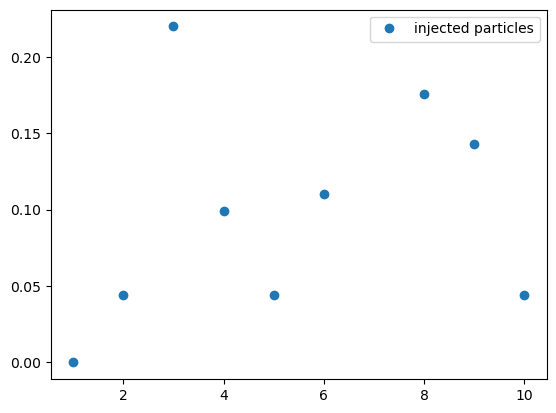

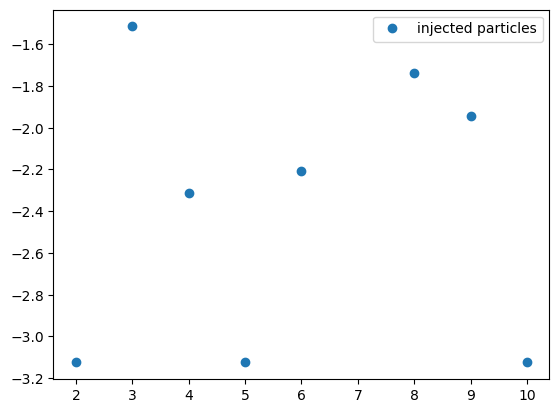

In [21]:

import numpy as np
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt
import time

np.random.seed(10)

# Parameters

deltat=0.005
D=0.8
deltar=np.sqrt(deltat*D*2) # boundary size
gamma=D/(deltar)**2
# whole domain is a times Ly, and each domain is deltar times deltar
Lx=deltar
Ly=deltar
a=2*deltar
C=50
# generate uniformly distributed particles in [0,0.5][0,1]
X=C*deltar**2
BC1=np.array([X])
print(BC1, 'number of particles in boudnary cell')
def concentrationmovement_tauleaping(Boundaryconcentration_t, tau, deltar, L, gamma, M): 
    '''
    Returns a list of positions (2D arrays) of the new particles in the PBS domain (Children). 
    The particles are injected with probability gamma. 

    Parameters:
    - Boundaryconcentration_t: list or array of Boundary concentration of each cell of length and width deltar (L/deltar= number of boundary cells).
    - M: number of sub-steps in tau-leaping.
    - tau: overall time step size.
    - deltar: spatial cell size.
    - L: domain size.
    - gamma: injection rate.
    
    Returns:
    - Children: List of 2D arrays with positions of newly injected particles in the PBS domain.
    '''
    
    Children = []
    
    # Loop over all boundary cells
    for i in range(len(Boundaryconcentration_t)):    
        
        particles_in_cell = Boundaryconcentration_t[i]  # Number of particles in cell i
        injected_particles = 0  # Number of injected particles initially 0
        delta_tau = tau / M  # Time step for each sub-step in tau-leaping
    
        # Loop over M sub-steps
        for k in range(M):
            if particles_in_cell <= injected_particles:
                break  # Exit loop if no more particles to inject
            
            Lambda = gamma * (particles_in_cell - injected_particles)
            injected_particles += np.random.poisson(Lambda * delta_tau)  # Update injected_particles
           
        # Inject particles into the domain based on the number injected
        for j in range(injected_particles):
            x_pos = np.random.uniform(L - deltar, L)
            y_pos = np.random.uniform(deltar * i, deltar * (i + 1))
            Children.append(np.array([x_pos, y_pos]))
        
        

    return Children


def concentrationmovement_Explicit( Boundaryconcentration_t, deltat,deltar, L, gamma): 
    
    '''
    Returns a list of positions (2D arrays) of the new particles in the PBS domain (Children). The particles are injected with proabibility gamma. 
    Only the particles that did not proliferated in the same time-step can be injected. Therefore we have to subtract the 'Extra' particles 
    from the total boundaryconcentrations.
    deltat=time
    Booundaryconcentration_t=list or array of Boundaryconcentration of each cell of length and width deltar (L/deltar= number of boundary cells).
    deltat=time-step size
    gamme=injection rate
    deltar=boundary cell length and width
    Extra=number of  actual dead virtal preys in the boundary cell
    L=domain size
    '''
    Children=[]
    Pr=1-np.exp(-gamma*deltat) # probability of injection
    for i in range(len(Boundaryconcentration_t)):       
        
        integ, dec = int(np.floor(Boundaryconcentration_t[i])), Boundaryconcentration_t[i]-int(np.floor(Boundaryconcentration_t[i]))
        for v in range(integ): # test for every particle           
            if Pr > np.random.rand():
                Children.append(np.array([np.random.uniform(L-deltar, L), np.random.uniform(deltar*i,deltar*(i+1))]))        
        if 1-np.exp(-gamma*deltat*dec)>np.random.rand(): # for the virtual particle
            Children.append(np.array([np.random.uniform(L-deltar,L), np.random.uniform(deltar*i, deltar*(i+1))]))

    return Children



InjectedParticles=[]
start=time.time()
sim=500
for s in range(sim):
    
    injectedparticles=concentrationmovement_Explicit(BC1, deltat, deltar, Lx,gamma)
    InjectedParticles.append(len(injectedparticles))
   
end=time.time()
print(end-start)
mean_particles = np.mean(InjectedParticles)
var_particles = np.var(InjectedParticles)



sim=500
ListM=[1,2,3,4,5,6,8,9,10]
Error=np.zeros(len(ListM))

for i in range(len(ListM)):
    InjectedParticles=[]
    
   
    for s in range(sim):
        start=time.time()
        injectedparticles=concentrationmovement_tauleaping(BC1, deltat, deltar, Lx,gamma, ListM[i])
        InjectedParticles.append(len(injectedparticles))
        end=time.time()
    # Calculate the mean and variance for each list
    
    if s==sim-1:
        print(end-start, i) 
    mean_particlesTau = np.mean(InjectedParticles)
    var_particlesTau = np.var(InjectedParticles)
    
   
    
    Error[i]= np.abs(mean_particlesTau-mean_particles)/mean_particles

  
fig=plt.figure()

plt.plot(ListM, Error,'o', label='injected particles')
plt.legend()


print(mean_particles,'mean', var_particles, 'var', mean_particlesTau,'tau_mean', var_particlesTau, 'tau var', 'prey')



print(BC1, 'all particles')


print('tau:',mean_particlesTau, 'number of injected particles')
print('explicit:',mean_particles, 'number of injected particles' )



fig=plt.figure()

plt.plot(ListM, np.log(Error), 'o', label='injected particles')
plt.legend()